## **Diabetes-Prediction-Personal-Use**
Dataset didapat dari https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/superizqi/Digital-Talent-Incubator-Telkom/master/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


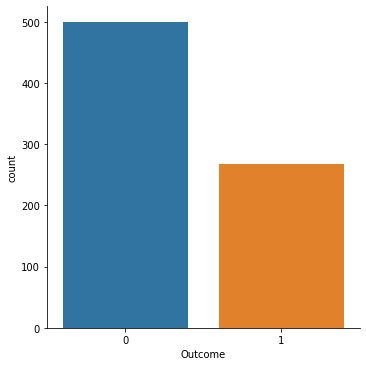

In [ ]:
import seaborn as sns
sns.catplot(x='Outcome', kind='count', data=df, orient='h')

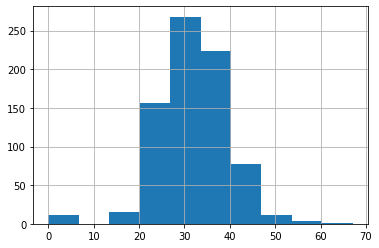

In [ ]:
df['BMI'].hist()

In [ ]:
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

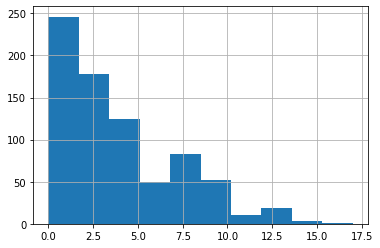

In [ ]:
df['Pregnancies'].hist()

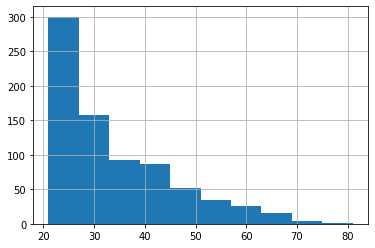

In [ ]:
df['Age'].hist()

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **Data Preprocessing**

In [ ]:
dfp = df[['Pregnancies','BMI','Age','Outcome']]
dfp.head()

,Pregnancies,BMI,Age,Outcome
0,6,33.6,50,1
1,1,26.6,31,0
2,8,23.3,32,1
3,1,28.1,21,0
4,0,43.1,33,1


In [ ]:
len(dfp['BMI'].loc[dfp['BMI'] == 0].tolist())

11

In [ ]:
dfp['BMI'] = dfp['BMI'].replace(0,dfp['BMI'].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(dfp['BMI'].loc[dfp['BMI'] == 0].tolist())

0

## **Building Model**

In [ ]:
x = dfp.drop('Outcome', axis=1)
y = dfp['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
# Set Training and Testing Data (80:20)
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test  = train_test_split(x , y, test_size=0.2, random_state=1, stratify=y)

# Show the Training and Testing Data
print(f"""{x_train.shape}  \n{x_test.shape}  \n{y_train.shape}  \n{y_test.shape} """)

(614, 3)  
(154, 3)  
(614,)  
(154,) 


In [ ]:
list_model = []
list_acc = []
list_precision = []
list_recall = []

def evaluation(m):
    model = m
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = round(metrics.accuracy_score(y_test, y_pred),2)
    prec = round(metrics.precision_score(y_test, y_pred),2)
    recall = round(metrics.recall_score(y_test, y_pred),2)
    list_model.append(str(model).split('(')[0])
    list_acc.append(acc)
    list_precision.append(prec)
    list_recall.append(recall)
    print(f"""Accuracy : {acc} \nPrecision : {prec} \nRecall : {recall}""")

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
evaluation(SVC())

Accuracy : 0.73 
Precision : 0.67 
Recall : 0.44


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
evaluation(KNeighborsClassifier())

Accuracy : 0.73 
Precision : 0.61 
Recall : 0.61


In [ ]:
from sklearn import tree
evaluation(tree.DecisionTreeClassifier(min_impurity_decrease=0.01))

Accuracy : 0.64 
Precision : 0.49 
Recall : 0.72


In [ ]:
from sklearn.naive_bayes import GaussianNB 
evaluation(GaussianNB())

Accuracy : 0.68 
Precision : 0.56 
Recall : 0.37


In [ ]:
from sklearn.ensemble import RandomForestClassifier
evaluation(RandomForestClassifier())

Accuracy : 0.71 
Precision : 0.58 
Recall : 0.57


In [ ]:
df_summary = pd.DataFrame({'Algoritma' : list_model, 'Accuracy' : list_acc, 'Precision' : list_precision, 'Recall' : list_recall})
df_summary.sort_values(by='Accuracy',ascending=False)

,Algoritma,Accuracy,Precision,Recall
0,SVC,0.73,0.67,0.44
1,KNeighborsClassifier,0.73,0.61,0.61
4,RandomForestClassifier,0.71,0.58,0.57
3,GaussianNB,0.68,0.56,0.37
2,DecisionTreeClassifier,0.64,0.49,0.72


In [ ]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
leaf_size = list(range(1,15))
n_neighbors = list(range(10,50))
p=[1,2]
algrthm = ['auto', 'ball_tree', 'kd_tree', 'brute']
params = {
    'algorithm' : algrthm,
    'leaf_size' : leaf_size,
    'n_neighbors' : n_neighbors,
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan'],
    'p' : p
}

In [ ]:
# Search Optimal Parameter Using Grid Search
gsmdl = GridSearchCV(model, params, n_jobs=4, cv=5)
gsmdl.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                         20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, ...],
                         'p': [1, 2], 'weights': ['uniform'

In [ ]:
gsmdl.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'euclidean',
 'n_neighbors': 25,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
model = KNeighborsClassifier(**gsmdl.best_params_)
evaluation(model)

Accuracy : 0.76 
Precision : 0.68 
Recall : 0.59


In [ ]:
# Search Optimal Parameter Using Elbow Method
accu = []
k = range(1,100)
for i in k:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accu.append(round(metrics.accuracy_score(y_test, y_pred),5))

In [ ]:
max(accu)

0.77273

In [ ]:
dff = pd.DataFrame({'k' : k,'acc' : accu})
dff.sort_values(by='acc',ascending=False).head()

,k,acc
31,32,0.77273
34,35,0.77273
35,36,0.76623
25,26,0.75974
33,34,0.75974


In [ ]:
model = KNeighborsClassifier(n_neighbors=32)
evaluation(model)

Accuracy : 0.77 
Precision : 0.76 
Recall : 0.52


In [ ]:
# plt.plot(k,accu)

## **Model Selection**

In [ ]:
model = KNeighborsClassifier(n_neighbors=32)
evaluation(model)

Accuracy : 0.77 
Precision : 0.76 
Recall : 0.52


In [ ]:
model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', model)])
pipe.fit(x,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=32, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
pipe.score(x_test, y_test)

0.7662337662337663

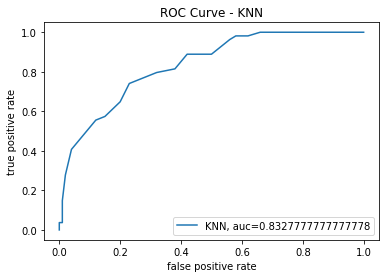

In [ ]:
y_pred_knn_proba = model.predict_proba(x_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
auc_knn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fpr_knn,tpr_knn,label="KNN, auc="+str(auc_knn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Berdasarkan beberapa percobaan diatas maka didapatkan kesimpulan untuk menggunakan Algoritma K-Nearest Neighbors dengan akurasi sebesar 77%, precision sebesar 76%, recall sebesar 52%, dan auc sebesar 0.83 .